# Step 1 : Load Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.datasets import load_diabetes
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('heart.csv')

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


1. age = umur
2. sex = jenis kelamin
3. chest pain type (4 values)
4. resting blood pressure = tekanan darah saat tubuh beristirahat
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl = tingkat gula darah setelah berpuasa
7. resting electrocardiographic results (values 0,1,2) = hasil elektrokardiogram (EKG) saat istirahat
8. maximum heart rate achieved = detak jantung maksimum
9. exercise induced angina = nyeri dada karena aktivitas fisik
10. oldpeak = ST depression induced by exercise relative to rest = penurunan segmen ST pada elektrokardiogram (EKG) yang terjadi selama atau setelah aktivitas fisik
11. ST_Slope = the slope of the peak exercise ST segment (perubahan sudut atau kemiringan dari segmen ST pada elektrokardiogram (EKG))




# Step 2 : EDA (Exploratory Data Analysis)

## Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 1. Check for Missing Values
Dari output di bawah, dapat terlihat bahwa tidak ada missing value untuk setiap fitur

In [4]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### 2. Basic Statistic
Output di bawah adalah deskripsi statistik untuk setiap fitur dalam dataset seperti mean, count, standar deviasi, minimum, maximum, dan nilai kuartil.

In [5]:
# Summary statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 3. Target Distribution
Output di bawah adalah countplot yang menunjukkan seberapa banyak value 0 (tidak terkena penyakit jantung) dan 1 (terkena penyakit jantung). Dapat dilihat bahwa value 0 sebanyak 410 dan value 1 lebih banyak yaitu sebanyak 508

Target Distribution:
 HeartDisease
1    508
0    410
Name: count, dtype: int64


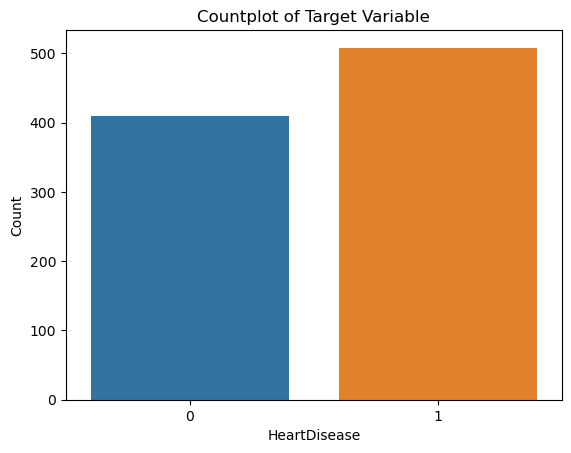

In [6]:
print("Target Distribution:\n", df['HeartDisease'].value_counts())
sns.countplot(x='HeartDisease', data=df)  # Gantilah 'target' dengan nama kolom yang diinginkan
plt.title('Countplot of Target Variable')  # Judul plot
plt.xlabel('HeartDisease')  # Label sumbu X
plt.ylabel('Count')  # Label sumbu Y
plt.show()

## Data Visualization

### 1. Heatmap Correlation
Berikut adalah output korelasi heatmap yang menggambarkan korelasi antar tiap fitur. Dapat dilihat bahwa fitur yang memiliki korelasi positif terbesar terhadap fitur Heart Disease adalah Oldpeak sebesar 0,40 dan fitur yang berkorelasi negatif terhadap fitur Heart Disease adalah MaxHR.

In [7]:
num_value = df.select_dtypes(include=np.number).columns.tolist() #digunakan untuk membuat list yang hanya berisi fitur numerik
num_value

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

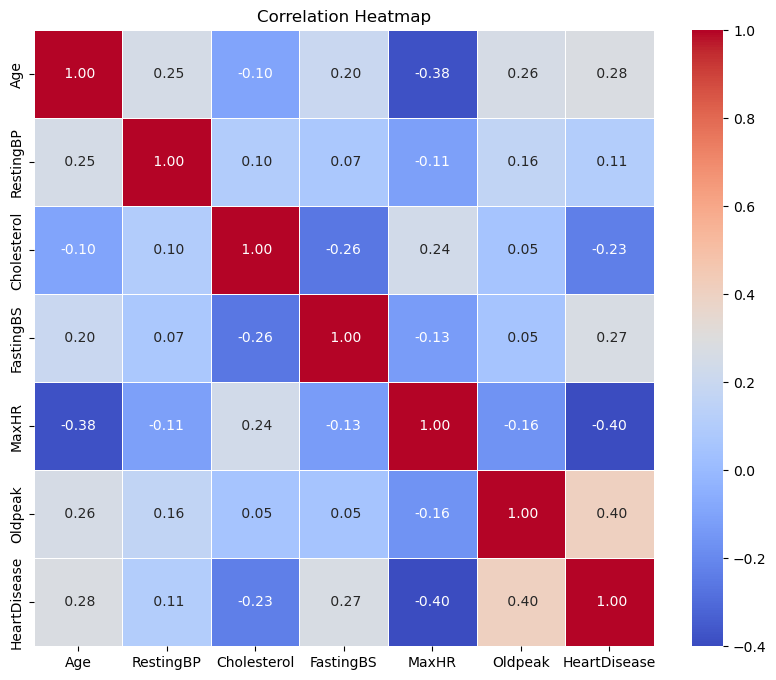

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_value].corr(), annot = True, fmt=" .2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### 2. Pair Plot

In [41]:
sns.pairplot(df, hue='HeartDisease')
plt.figure(figsize=(6, 4))

plt.show()

### 3. Distribution of Each Feature
Output di bawah adalah visualisasi boxplot untuk setiap fitur dalam dataset. Dapat dilihat bahwa terdapat indikasi outliers pada semua fitur numerik kecuali Age dan HeartDisease.

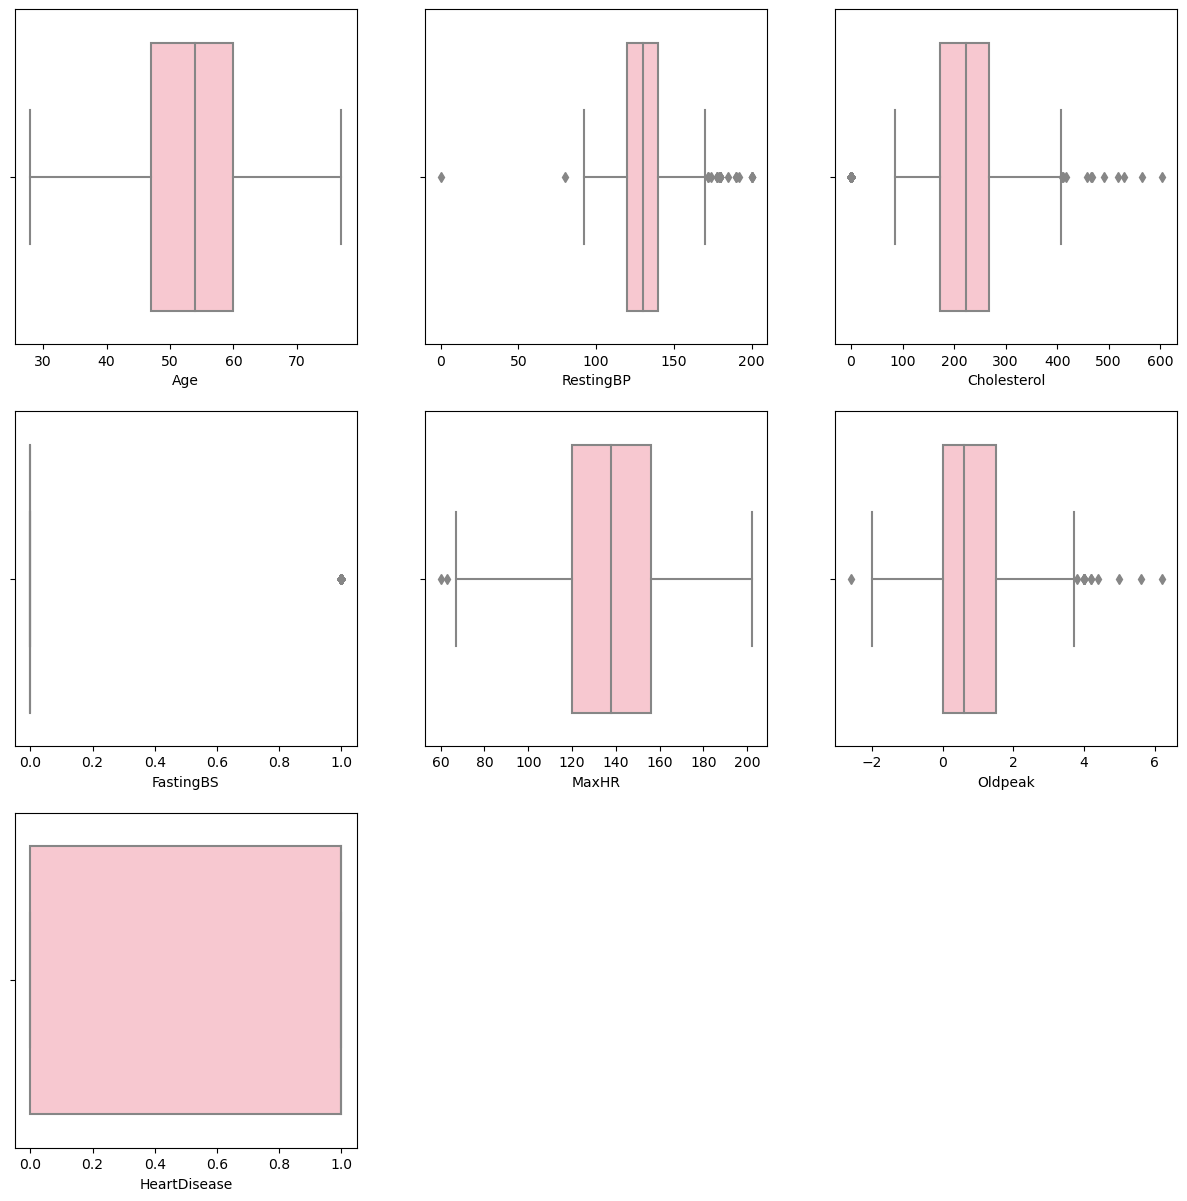

In [10]:
plt.figure(figsize=(15,20))
for i in range(len(num_value)):
    plt.subplot(len(num_value)-3,3,i+1)
    sns.boxplot(data = df, x=num_value[i], color= 'pink')

### 4. Boxplot of Each Feature
Output di bawah adalah visualisasi boxplot setiap fitur terhadap fitur target (HeartDisease)

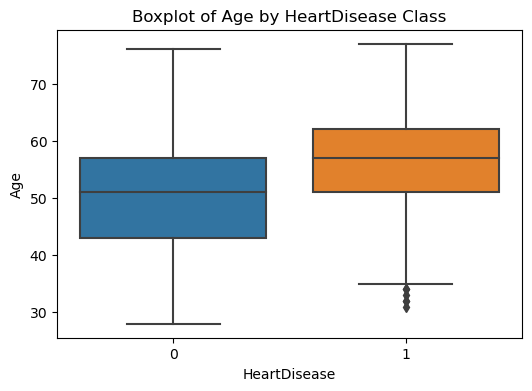

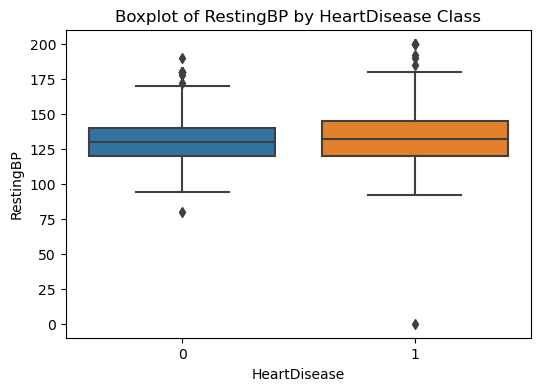

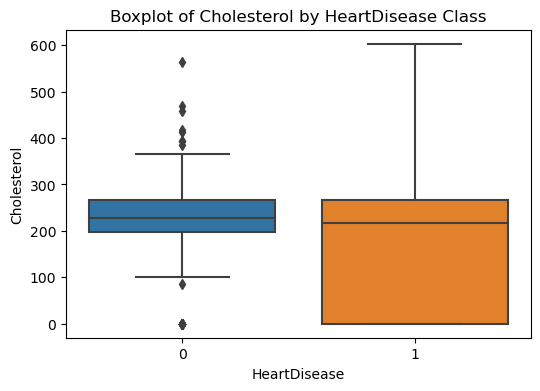

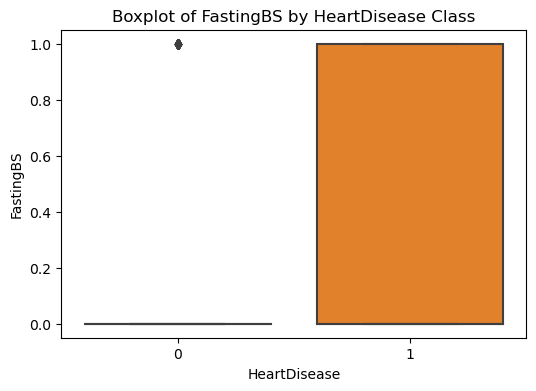

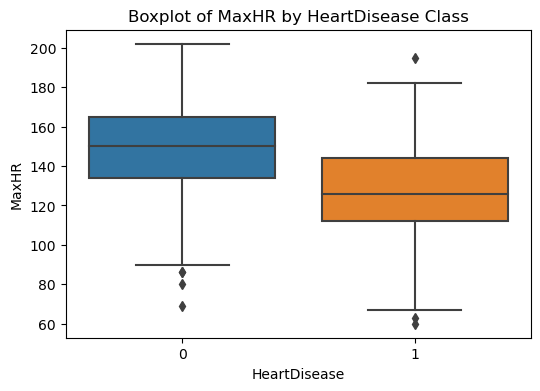

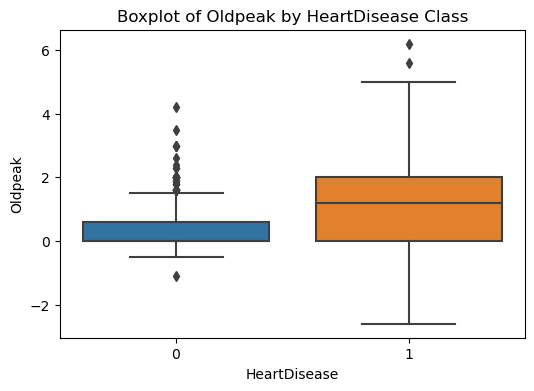

In [11]:
for col in num_value:
    if col != 'HeartDisease':  # Pastikan tidak membuat boxplot untuk kolom target
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x='HeartDisease', y=col)  # Menggunakan 'HeartDisease' sebagai target
        plt.title(f"Boxplot of {col} by HeartDisease Class")
        plt.show()

### 5. Violin Plots
Violin plots digunakan untuk menggambarkan distribusi data pada setiap fitur dimana lebar violin menggambarkan variabilitas data setiap fiturnya.

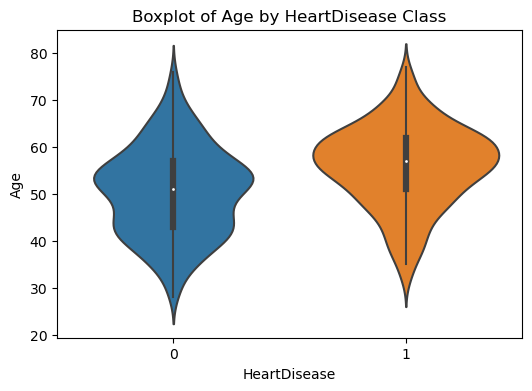

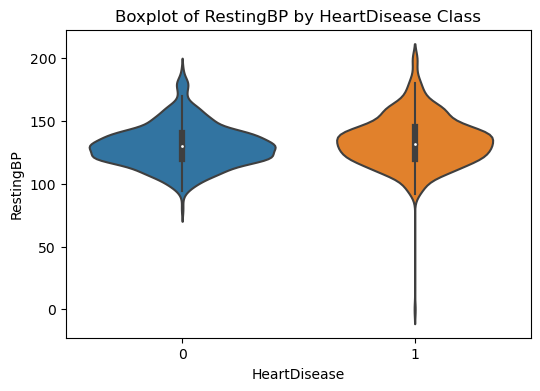

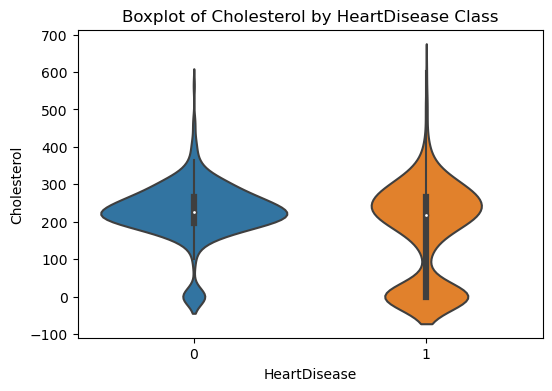

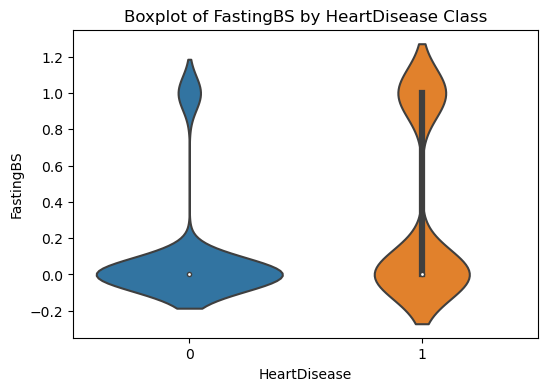

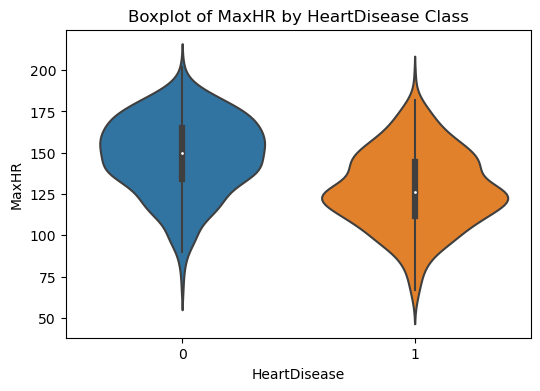

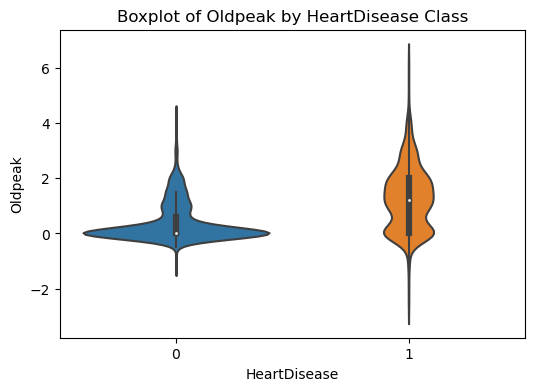

In [44]:
for col in num_value:
    if col != 'HeartDisease':  # Pastikan tidak membuat boxplot untuk kolom target
        plt.figure(figsize=(6, 4))
        sns.violinplot(data=df, x='HeartDisease', y=col)  # Menggunakan 'HeartDisease' sebagai target
        plt.title(f"Boxplot of {col} by HeartDisease Class")
        plt.show()

## Feature Relationship

### 1. Pairwase Correlation

In [ ]:
# Correlation scatter plots (pairplot)
sns.pairplot(df, kind="scatter", hue="HeartDisease", markers=["o", "s", "D"])
plt.show()

## Step 5 : Outlier Detection

### 1. Boxplot for Outliers
Output di bawah adalah visualisasi boxplot untuk setiap fitur dalam dataset. Dapat dilihat bahwa terdapat indikasi outliers pada semua fitur numerik kecuali Age.

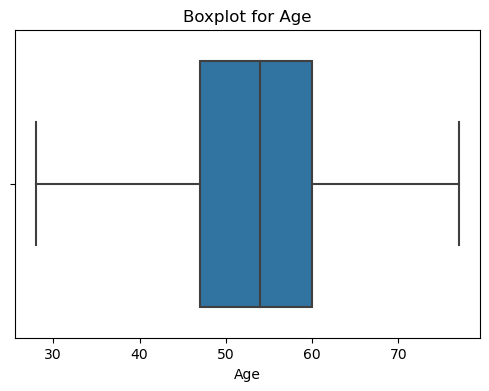

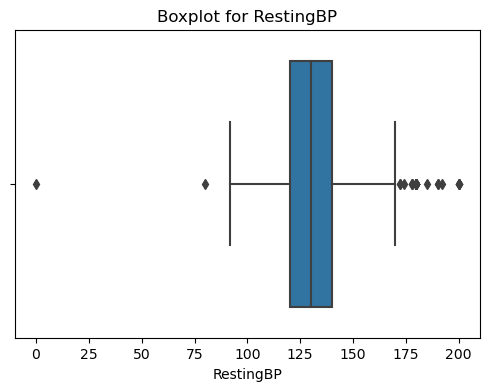

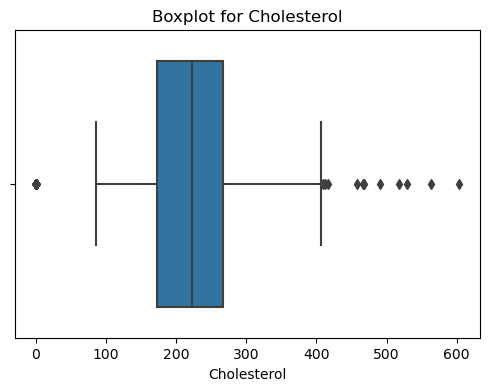

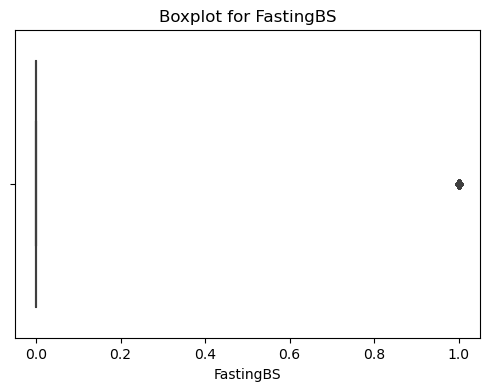

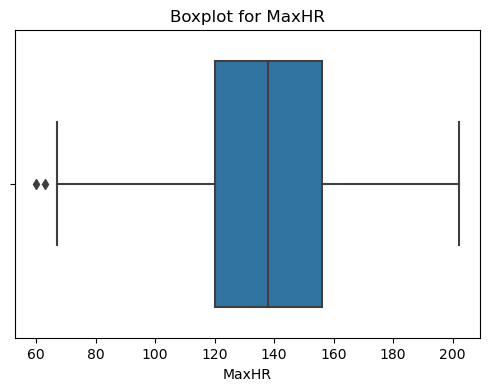

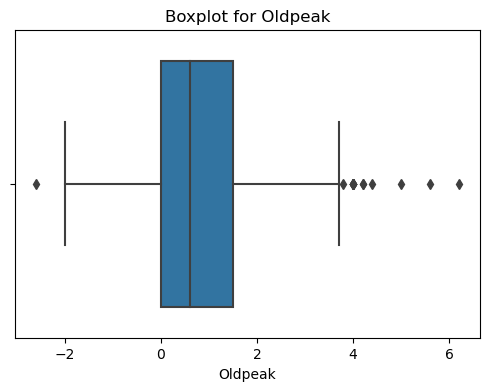

In [14]:
for col in num_value:
    if col != 'HeartDisease':  # Pastikan tidak membuat boxplot untuk kolom target
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=col)  # Menggunakan 'HeartDisease' sebagai target
        plt.title(f"Boxplot for {col}")
        plt.show()

# Step 3 : Data Preprocessing
Langkah selanjutnya yaitu data preprocessing. Kode di bawah adalah kode untuk mengubah variabel kategorikal menjadi variabel numerik. Fitur yang diubah dengan one hot encoding antara lain variabel Sex, ChestPainType, RestingECG, ExerciseAngine, dan ST_Slope

In [15]:
def onehot_encode(df, col_dict):
    for col, prefix in col_dict.items():
        dummies = pd.get_dummies(df[col], prefix=prefix).astype('int')
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(col, axis=1)
        
    return df

In [16]:
df = onehot_encode(
    df,
    {
    'Sex':'Sex',
    'ChestPainType':'ChestPainType',
    'RestingECG':'RestingECG',
    'ExerciseAngina':'ExerciseAngina',
    'ST_Slope':'ST_Slope'    
    }
)

In [17]:
 df #berikut adalah dataset yang sudah dilakukan one hot encoding sehingga semua jenis data pada setiap fitur sudah berupa numerik.

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [18]:
X = df.drop(columns = ['HeartDisease']) #drop kolom HeartDisease pada variabel X
y = df[['HeartDisease']] #untuk variabel y hanya menggunakan kolom HeartDisease

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,42,120,240,1,194,0.8,0,1,0,0,1,0,0,1,0,1,0,1,0,0
25,36,130,209,0,178,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
84,56,150,213,1,125,1.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
10,37,130,211,0,142,0.0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
344,51,120,0,1,104,0.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,48,120,254,0,110,0.0,1,0,1,0,0,0,0,0,1,1,0,0,0,1
270,45,120,225,0,140,0.0,0,1,1,0,0,0,0,1,0,1,0,0,0,1
860,60,130,253,0,144,1.4,0,1,1,0,0,0,0,1,0,0,1,0,0,1
435,60,152,0,0,118,0.0,0,1,1,0,0,0,0,0,1,0,1,0,0,1


In [21]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4 : Modeling
Kode di bawah adalah fungsi untuk melakukan evaluasi klasifikasi dengan def dan return sehingga jika suatu saat melakukan model dan ingin evaluasi, hanya tinggal panggil fungsi eval_classification.

In [22]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.model_selection import cross_validate

def eval_classification(model, x_tra, x_tes, y_tra, y_tes, threshold):
    #y_pred = model.predict(x_tes)
    y_pred_train = model.predict(x_tra)
    y_pred_proba_train = model.predict_proba(x_tra)

    y_pred_proba = model.predict_proba(x_tes)

    threshold = threshold
    y_pred = (y_pred_proba[:, 1] >= threshold).astype('int')

    print(classification_report(y_tes, y_pred))

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_tes, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_tes, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_tes, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_tes, y_pred))
    print("roc_auc (test-proba): %.4f" % roc_auc_score(y_tes, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.4f" % roc_auc_score(y_tra, y_pred_proba_train[:, 1]))

    #Plotting Confusion Matrix
    print(f"Confusion Matrix: \n {confusion_matrix(y_tes, y_pred)}\n")

## 1 - Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
eval_classification(lr, X_train, X_test, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Accuracy (Test Set): 0.85
Precision (Test Set): 0.90
Recall (Test Set): 0.84
F1-Score (Test Set): 0.87
roc_auc (test-proba): 0.9266
roc_auc (train-proba): 0.9340
Confusion Matrix: 
 [[67 10]
 [17 90]]



Dengan menggunakan Logistic Regression, didapat akurasi sebesar 85% dan perbedaan roc train dan test hanya sekitar 0,74%

## 2 - Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred = NB.predict(X_test)
eval_classification(NB, X_train, X_test, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        77
           1       0.93      0.83      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

Accuracy (Test Set): 0.86
Precision (Test Set): 0.93
Recall (Test Set): 0.83
F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.9244
roc_auc (train-proba): 0.9213
Confusion Matrix: 
 [[70  7]
 [18 89]]



Dengan menggunakan Naive Bayes, didapat akurasi sebesar 86% dan perbedaan roc train dan test hanya sekitar 0,31%


## 3 - Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = rf.predict(X_test)
eval_classification(rf, X_train, X_test, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Accuracy (Test Set): 0.88
Precision (Test Set): 0.90
Recall (Test Set): 0.90
F1-Score (Test Set): 0.90
roc_auc (test-proba): 0.9394
roc_auc (train-proba): 1.0000
Confusion Matrix: 
 [[66 11]
 [11 96]]



Dengan menggunakan Random Forest, didapat akurasi sebesar 88% dan perbedaan roc train dan test sekitar 5,73%


## 4 - Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred = clf.predict(X_test)
eval_classification(clf, X_train, X_test, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        77
           1       0.87      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184

Accuracy (Test Set): 0.80
Precision (Test Set): 0.87
Recall (Test Set): 0.78
F1-Score (Test Set): 0.82
roc_auc (test-proba): 0.8099
roc_auc (train-proba): 1.0000
Confusion Matrix: 
 [[65 12]
 [24 83]]



Dengan menggunakan Decision Tree, didapat akurasi sebesar 80% dan perbedaan roc train dan test sekitar 19,19%


## 5 - K-Nearest Neighbor

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred = knn.predict(X_test)
eval_classification(knn, X_train, X_test, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        77
           1       0.90      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184

Accuracy (Test Set): 0.83
Precision (Test Set): 0.90
Recall (Test Set): 0.79
F1-Score (Test Set): 0.84
roc_auc (test-proba): 0.8901
roc_auc (train-proba): 0.9765
Confusion Matrix: 
 [[68  9]
 [23 84]]



Dengan menggunakan K-Nearest Neighbor, didapat akurasi sebesar 83% dan perbedaan roc train dan test hanya sekitar 8,64%


## 6 - SVM

In [33]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, gamma=0.001, random_state=42, probability=True)
svm.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear', probability=True, random_state=42)

In [34]:
y_pred = svm.predict(X_test)
eval_classification(svm, X_train, X_test, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Accuracy (Test Set): 0.85
Precision (Test Set): 0.90
Recall (Test Set): 0.84
F1-Score (Test Set): 0.87
roc_auc (test-proba): 0.9249
roc_auc (train-proba): 0.9327
Confusion Matrix: 
 [[67 10]
 [17 90]]



## 7 - Hypertuning for Logistic Regression & KNN

In [35]:
from sklearn.model_selection import GridSearchCV

lr_cv = LogisticRegression()

penalty = ['l1','l2']
C=[0.5, 0.6, 0.7, 0.8]
class_weight = [
    {1:0.5, 0:0.5},
    {1:0.4, 0:0.6},
    {1:0.6, 0:0.4},
    {1:0.7, 0:0.3},
]
solver=['liblinear', 'saga']

param_grid = dict(
    penalty = penalty,
    C=C,
    class_weight = class_weight,
    solver = solver
)

lr_cv = GridSearchCV(
    estimator=lr_cv,
    param_grid=param_grid,
    scoring='recall',
    verbose=1,
    n_jobs=-1,
    cv=5
)

lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'C': 0.5, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l1', 'solver': 'saga'}


In [36]:
from sklearn.linear_model import LogisticRegression

lr_1 = LogisticRegression(**best_params)
lr_1.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight={0: 0.3, 1: 0.7}, penalty='l1',
                   solver='saga')

In [37]:
eval_classification(lr_1, X_train, X_test, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        77
           1       0.88      0.91      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

Accuracy (Test Set): 0.88
Precision (Test Set): 0.88
Recall (Test Set): 0.91
F1-Score (Test Set): 0.89
roc_auc (test-proba): 0.9281
roc_auc (train-proba): 0.9333
Confusion Matrix: 
 [[64 13]
 [10 97]]



Dengan menggunakan Logistic Regression yang dihypertunign, didapat akurasi sebesar 88% dan perbedaan roc train dan test hanya sekitar 0,52%

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2,30,1)}

knn_cv=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid=parameter,cv=kf,verbose=1)
knn_cv.fit(X_train,y_train)

print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 27}


In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [40]:
eval_classification(knn, X_train, X_test, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy (Test Set): 0.85
Precision (Test Set): 0.89
Recall (Test Set): 0.84
F1-Score (Test Set): 0.87
roc_auc (test-proba): 0.9354
roc_auc (train-proba): 0.9348
Confusion Matrix: 
 [[66 11]
 [17 90]]



Dengan menggunakan K-Nearest Neighbor, didapat akurasi sebesar 85% dan perbedaan roc train dan test hanya sekitar 0,06%

## Dari beberapa algoritma yang digunakan, model dengan akurasi terbaik yakni KNN dengan akurasi 85% dan perbedaan roc train test sebesar 0,06%. Lalu yang kedua ada Naive Bayes dengan akurasi 86% dan perbedaan roc train test sebesar 0,31%.